In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/0-25ab/0.25aa.txt
/kaggle/input/testmulti/finalTestMultiScale.txt
/kaggle/input/0-25a-split/0.25a/NoNan0.25aa_part_ac.txt
/kaggle/input/0-25a-split/0.25a/NoNan0.25aa_part_ae.txt
/kaggle/input/0-25a-split/0.25a/NoNan0.25aa_part_af.txt
/kaggle/input/0-25a-split/0.25a/NoNan0.25aa_part_ad.txt
/kaggle/input/0-25a-split/0.25a/NoNan0.25aa_part_aa.txt
/kaggle/input/0-25a-split/0.25a/NoNan0.25aa_part_ab.txt
/kaggle/input/model-ae/model_ae.pkl
/kaggle/input/model-ac/model_ac.pkl
/kaggle/input/model-ad/model_ad.pkl
/kaggle/input/model-a/model_a.pkl
/kaggle/input/multiscale/multiScale.txt
/kaggle/input/model-ab/model_ab.pkl


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from scipy.stats import mode


In [3]:
import numpy as np
from collections import Counter
from sklearn.utils import resample

def load_data(filename):
     # Read the first line to get the column names and set desired feature order
    with open(filename, 'r') as file:
        column_names = file.readline().strip().split()
    column_names[0] = 'X'

    feature_order = [
        'X', 'Y', 'Z', 'R', 'G', 'B',  'Planarity_(0.1)', 'Linearity_(0.1)', 'PCA1_(0.1)', 'Sphericity_(0.1)', 'Verticality_(0.1)', 
        'Planarity_(0.25)', 'Linearity_(0.25)', 'PCA1_(0.25)', 'Sphericity_(0.25)', 'Verticality_(0.25)', '1st_eigenvalue_(0.25)', 
        'Planarity_(0.5)', 'Linearity_(0.5)', 'PCA1_(0.5)', 'Sphericity_(0.5)', 'Verticality_(0.5)', '1st_eigenvalue_(0.5)', 
        'Planarity_(1)', 'Linearity_(1)', 'PCA1_(1)', 'Sphericity_(1)', 'Verticality_(1)', '1st_eigenvalue_(1)'
    ]

    max_points_per_class = 200000
    # Read the data skipping the first line
    data = np.genfromtxt(filename, skip_header=1)
    
    # Remove rows with NaN values
    data = data[~np.isnan(data).any(axis=1)]
    
    # Reorder the features based on the desired order
    feature_indices = [column_names.index(feature) for feature in feature_order[:-1]]  # Exclude 'Classification'
    features = data[:, feature_indices]
    
    # Extract labels
    label_index = column_names.index('Classification')
    labels = data[:, label_index].astype(int)
    
    # Perform class balancing with maximum points per class
    class_counts = Counter(labels)
    balanced_features = []
    balanced_labels = []
    for cls, count in class_counts.items():
        cls_features = features[labels == cls]
        cls_labels = np.full((count,), cls, dtype=int)
        if count > max_points_per_class:
            # Downsample majority class
            cls_features_resampled = resample(cls_features, n_samples=max_points_per_class, replace=False, random_state=42)
            cls_labels_resampled = resample(cls_labels, n_samples=max_points_per_class, replace=False, random_state=42)
            balanced_features.append(cls_features_resampled)
            balanced_labels.append(cls_labels_resampled)
        else:
            balanced_features.append(cls_features)
            balanced_labels.append(cls_labels)
    
    balanced_features = np.concatenate(balanced_features)
    balanced_labels = np.concatenate(balanced_labels)
    
    # Print class counts
    print("Class Counts:")
    for cls, count in sorted(class_counts.items()):
        print(f"Class {cls}: {count}")
    
    # Print balanced label counts
    balanced_label_counts = Counter(balanced_labels)
    print("\nBalanced Label Counts:")
    for cls, count in sorted(balanced_label_counts.items()):
        print(f"Class {cls}: {count}")
    
    return balanced_features, balanced_labels

# filename = '/kaggle/input/0-25a-split/0.25a/NoNan0.25aa_part_ae.txt' 
# points, labels = load_data(filename)
# num_classes = len(np.unique(labels))

# print("Total number of classes:", num_classes)


In [4]:
# print(points[11])

In [5]:
# nan_rows = np.any(np.isnan(points), axis=1)
# num_nan_rows = np.sum(nan_rows)

# print(f"Number of rows containing NaN values: {num_nan_rows}")
# total_rows = points.shape[0]
# print(f"Total number of rows: {total_rows}")
# print(f"Total number of labels",labels.shape)

In [6]:
# X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, random_state=42)

# # Initialize Random Forest classifier
# random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train the classifier
# random_forest.fit(X_train, y_train)



In [7]:
# from joblib import load

# # Load the model from the .pkl file
# random_forest = load('/kaggle/input/model-ad/model_ad.pkl')
# random_forest.fit(points,labels)

In [8]:
# # Predict on the test set
# y_pred = random_forest.predict(X_test)
# y_pred


In [9]:
# # Predict on the test set
# y_pred = random_forest.predict(points)
# y_pred


In [10]:
# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [11]:
# # Calculate accuracy
# accuracy = accuracy_score(labels, y_pred)
# print("Accuracy:", accuracy)

In [12]:
# import joblib
# joblib.dump(random_forest, 'model_ae.pkl')


In [13]:
import numpy as np
from collections import Counter
from sklearn.utils import resample

def load_testData(filename):
     # Read the first line to get the column names and set desired feature order
    with open(filename, 'r') as file:
        column_names = file.readline().strip().split()
    column_names[0] = 'X'

    feature_order = [
        'X', 'Y', 'Z', 'R', 'G', 'B',  'Planarity_(0.1)', 'Linearity_(0.1)', 'PCA1_(0.1)', 'Sphericity_(0.1)', 'Verticality_(0.1)', 
        'Planarity_(0.25)', 'Linearity_(0.25)', 'PCA1_(0.25)', 'Sphericity_(0.25)', 'Verticality_(0.25)', '1st_eigenvalue_(0.25)', 
        'Planarity_(0.5)', 'Linearity_(0.5)', 'PCA1_(0.5)', 'Sphericity_(0.5)', 'Verticality_(0.5)', '1st_eigenvalue_(0.5)', 
        'Planarity_(1)', 'Linearity_(1)', 'PCA1_(1)', 'Sphericity_(1)', 'Verticality_(1)', '1st_eigenvalue_(1)'
    ]

    max_points_per_class = 200000
    # Read the data skipping the first line
    data = np.genfromtxt(filename, skip_header=1)
    
    # Remove rows with NaN values
    data = data[~np.isnan(data).any(axis=1)]
    
    # Reorder the features based on the desired order
    feature_indices = [column_names.index(feature) for feature in feature_order[:-1]]  # Exclude 'Classification'
    features = data[:, feature_indices]
    
    # Extract labels
    label_index = column_names.index('Classification')
    labels = data[:, label_index].astype(int)
    
    return features,labels
 

# filename = '/kaggle/input/multiscale/multiScale.txt' 
# points, labels = load_data(filename)
# num_classes = len(np.unique(labels))

# print("Total number of classes:", num_classes)


In [14]:
# points,labels = load_testData('/kaggle/input/testmulti/finalTestMultiScale.txt')

In [15]:
# # Predict on the test set
# y_pred = random_forest.predict(points)
# y_pred


In [16]:
# # Calculate accuracy
# accuracy = accuracy_score(labels, y_pred)
# print("Accuracy:", accuracy)

In [17]:
# from sklearn.metrics import f1_score

# f1 = f1_score(labels, y_pred, average='weighted')  
# print("F1-score:", f1)

In [18]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# # Assuming you have true labels stored in 'true_labels' and predicted labels stored in 'predicted_labels'
# # Calculate the confusion matrix
# conf_matrix = confusion_matrix(labels, y_pred)

# # Define class labels
# class_labels = np.unique(np.concatenate((labels, y_pred)))

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.set(font_scale=0.8)  # Adjust font scale if necessary
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
#             xticklabels=class_labels, yticklabels=class_labels)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()


In [19]:
def save_data(points, predicted_labels, filename):
    with open(filename, 'w') as file:
        # Write comment line with column names
        file.write("// X Y Z R G B predictedClassification\n")
        # Write data lines
        for i in range(len(points)):
            point = points[i][:6]
            predicted_label = predicted_labels[i]
            data_str = ' '.join([str(coord) for coord in point]) + f' {predicted_label}\n'
            file.write(data_str)

In [20]:
# save_data(points, y_pred, "multiClassTestPredict_model_ae.txt")


In [21]:
testDataPoints,testLabels = load_testData('/kaggle/input/testmulti/finalTestMultiScale.txt')

In [22]:
from joblib import load

# Load your models from joblib files
model_ab = load('/kaggle/input/model-ab/model_ab.pkl')
model_ac = load('/kaggle/input/model-ac/model_ac.pkl')
model_ad = load('/kaggle/input/model-ad/model_ad.pkl')
model_ae = load('/kaggle/input/model-ae/model_ae.pkl')

# Assuming testDataPoints is your test data points and testLabels are the corresponding labels
# Make predictions using each model
pred_ab = model_ab.predict(testDataPoints)
pred_ac = model_ac.predict(testDataPoints)
pred_ad = model_ad.predict(testDataPoints)
pred_ae = model_ae.predict(testDataPoints)

# Ensemble predictions using voting (mode)
ensemble_pred = np.array([pred_ab, pred_ac, pred_ad, pred_ae])
ensemble_labels, _ = mode(ensemble_pred, axis=0)

# Convert numpy array to 1D array
ensemble_labels = ensemble_labels.flatten()

# Evaluate accuracy
accuracy = accuracy_score(testLabels, ensemble_labels)
print("Ensemble Test Accuracy:", accuracy)

Ensemble Test Accuracy: 0.7395438685191776


In [23]:
from sklearn.metrics import f1_score

f1 = f1_score(testLabels, ensemble_labels, average='weighted')  
print("F1-score:", f1)

F1-score: 0.729298946002086


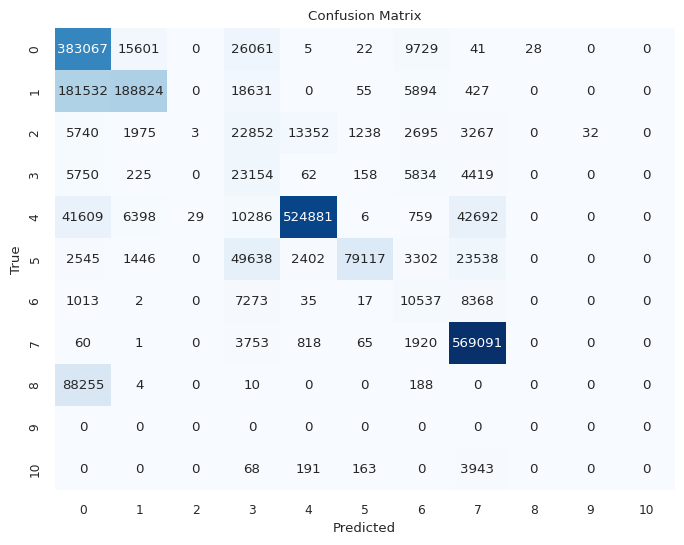

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have true labels stored in 'true_labels' and predicted labels stored in 'predicted_labels'
# Calculate the confusion matrix
conf_matrix = confusion_matrix(testLabels, ensemble_labels)

# Define class labels
class_labels = np.unique(np.concatenate((testLabels, ensemble_labels)))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=0.8)  # Adjust font scale if necessary
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [25]:
save_data(testDataPoints,ensemble_labels,"EnsembleSave.txt")